# Assignment #8


In [1]:
#First, we install and import the libraries

#!pip install chardet
#!pip install geopandas

import chardet
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString

In [2]:
!pip install folium
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap
import matplotlib.pyplot as plt
import geopandas as gpd

1. Import data from the online source

In [3]:
# Gettting the character format (encoding type)

base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [4]:
# Step 1: We get the encoding and format type of the characters that compose the dataset
directory = r'../../_data/data_dengue_peru.csv' #Definition of the directory
with open(directory, 'rb') as file: #Opening the file in binary mode
    content_file = file.read()

characters = chardet.detect(content_file) #Use Chardet to detect the coding
encoding = characters['encoding']

# Data importation
df_dengue = pd.read_csv(directory, encoding=encoding, dtype={'Ubigeo': 'str'}, low_memory=False) #read csv, parameters specified


df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. 

In [5]:
df_dengue['UBIPROV'] = df_dengue['Ubigeo'].astype(str).str[0:4].copy()
df_dengue['UBIDPTO'] = df_dengue['Ubigeo'].astype(str).str[0:2].copy()

df_dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,UBIPROV,UBIDPTO
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2,0809,08
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0,0809,08
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2,0809,08
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17


3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use the provided shapefile.


In [6]:
# Download shape file at district level

maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [7]:
maps

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [8]:
#Check unique values
maps['CODIGO'].is_unique

True

In [9]:
maps['CODIGO'].unique().size

1874

In [10]:
df_dengue.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172144 entries, 0 to 172143
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Año              172144 non-null  int64 
 1   Semana           172144 non-null  int64 
 2   Eventos o daños  172144 non-null  object
 3   Departamento     172144 non-null  object
 4   Distrito         172144 non-null  object
 5   Provincia        172144 non-null  object
 6   Ubigeo           172144 non-null  object
 7   Casos            166047 non-null  object
 8   UBIPROV          172144 non-null  object
 9   UBIDPTO          172144 non-null  object
dtypes: int64(2), object(8)
memory usage: 13.1+ MB


In [11]:
# Filtrar Año 2021
dengue_2021 = df_dengue[df_dengue.Año == 2021]
dengue_2021

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,UBIPROV,UBIDPTO
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,1801,18
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,1501,15
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,1501,15
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,1501,15
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,1703,17


In [12]:
#Agrupar por Ubigeo
dengue_2021["Casos"] = dengue_2021["Casos"].astype('Int64')

dengue_2021

C:\Users\kramirez\AppData\Local\Temp\ipykernel_23892\122393096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021["Casos"] = dengue_2021["Casos"].astype('Int64')


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,UBIPROV,UBIDPTO
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,1801,18
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,1801,18
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,<NA>,1501,15
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,<NA>,1501,15
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,<NA>,1501,15
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,<NA>,1702,17
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,<NA>,1703,17
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,<NA>,1702,17
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,<NA>,1703,17


In [13]:
#Máximo de casos de dengue en un distrito por semana
dengue_2021["Casos"].max()


232

In [14]:
#Prueba en agrupar por ubigeo

dengue_max = dengue_2021[dengue_2021.Ubigeo == "010201"]
dengue_max.groupby( [ 'Año' ], as_index = False )[ [ 'Casos' ] ].sum()

,Año,Casos
0,2021,474


In [15]:
#AGRUPAR POR UBIGEO (distrito)

dengue_2021_1 = dengue_2021.groupby( [ 'Ubigeo' ], as_index = False )[ [ 'Casos' ] ].sum()
dengue_2021_1

,Ubigeo,Casos
0,010101,0
1,010201,474
2,010202,25
3,010203,38
4,010204,8
...,...,...
464,250302,26
465,250303,32
466,250304,14
467,250305,2


In [16]:
# Máximo de casos por distrito
dengue_2021_1["Casos"].max()

2267

In [17]:
#verificar dtypes de ambas bases antes de hacer merge
print(dengue_2021_1.dtypes)
print("")
print(maps.dtypes)

Ubigeo    object
Casos      Int64
dtype: object

CCDD            object
NOMBDEP         object
CCPP            object
NOMBPROV        object
CCDI            object
NOMBDIST        object
CAPITAL         object
UBIGEO          object
IDPROV          object
CODIGO          object
CNT_CCPP         int64
DESCRIPCIO      object
DESCARGAR       object
WHATSAPP        object
CONTACTO        object
geometry      geometry
dtype: object


In [18]:
# Convertir ambos identificadores del merge a mismo tipo
dengue_2021_1['Ubigeo'] = dengue_2021_1['Ubigeo'].astype('int64')
maps['UBIGEO'] = maps['UBIGEO'].astype('int64')

print(dengue_2021_1.dtypes)
print(maps.dtypes)

Ubigeo    int64
Casos     Int64
dtype: object
CCDD            object
NOMBDEP         object
CCPP            object
NOMBPROV        object
CCDI            object
NOMBDIST        object
CAPITAL         object
UBIGEO           int64
IDPROV          object
CODIGO          object
CNT_CCPP         int64
DESCRIPCIO      object
DESCARGAR       object
WHATSAPP        object
CONTACTO        object
geometry      geometry
dtype: object


In [19]:
#Merge datasets
dg_map1 = maps.merge(dengue_2021_1, left_on='UBIGEO', right_on='Ubigeo', how='left')

#Check if it is correct
dg_map1["Casos"].max()

2267

In [20]:
# Verify dtypes
dg_map1.dtypes

CCDD            object
NOMBDEP         object
CCPP            object
NOMBPROV        object
CCDI            object
NOMBDIST        object
CAPITAL         object
UBIGEO           int64
IDPROV          object
CODIGO          object
CNT_CCPP         int64
DESCRIPCIO      object
DESCARGAR       object
WHATSAPP        object
CONTACTO        object
geometry      geometry
Ubigeo         float64
Casos            Int64
dtype: object

In [21]:
# Change "Casos" to a readable type by geopandas
dg_map1["Casos"] = dg_map1["Casos"].astype("float64")
dg_map1['Casos'].dtype

dtype('float64')

<Axes: >

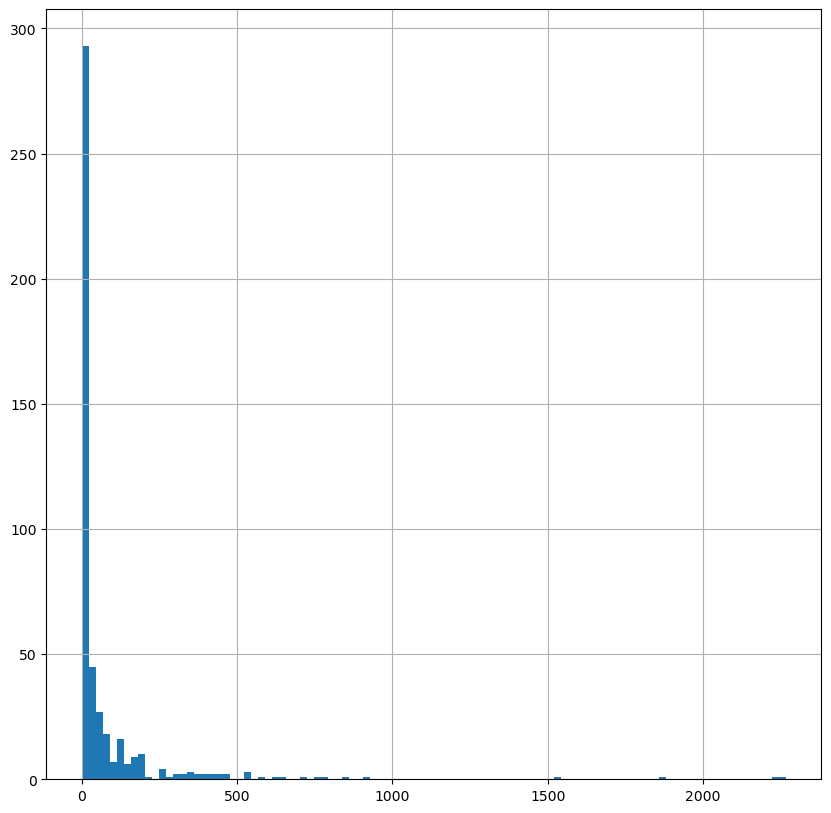

In [22]:
# First always check the distribution|
fig, ax = plt.subplots(figsize=(10, 10))
dg_map1["Casos"].hist(bins = 100)

#check the distribution of the variables BEFORE PLOTTING

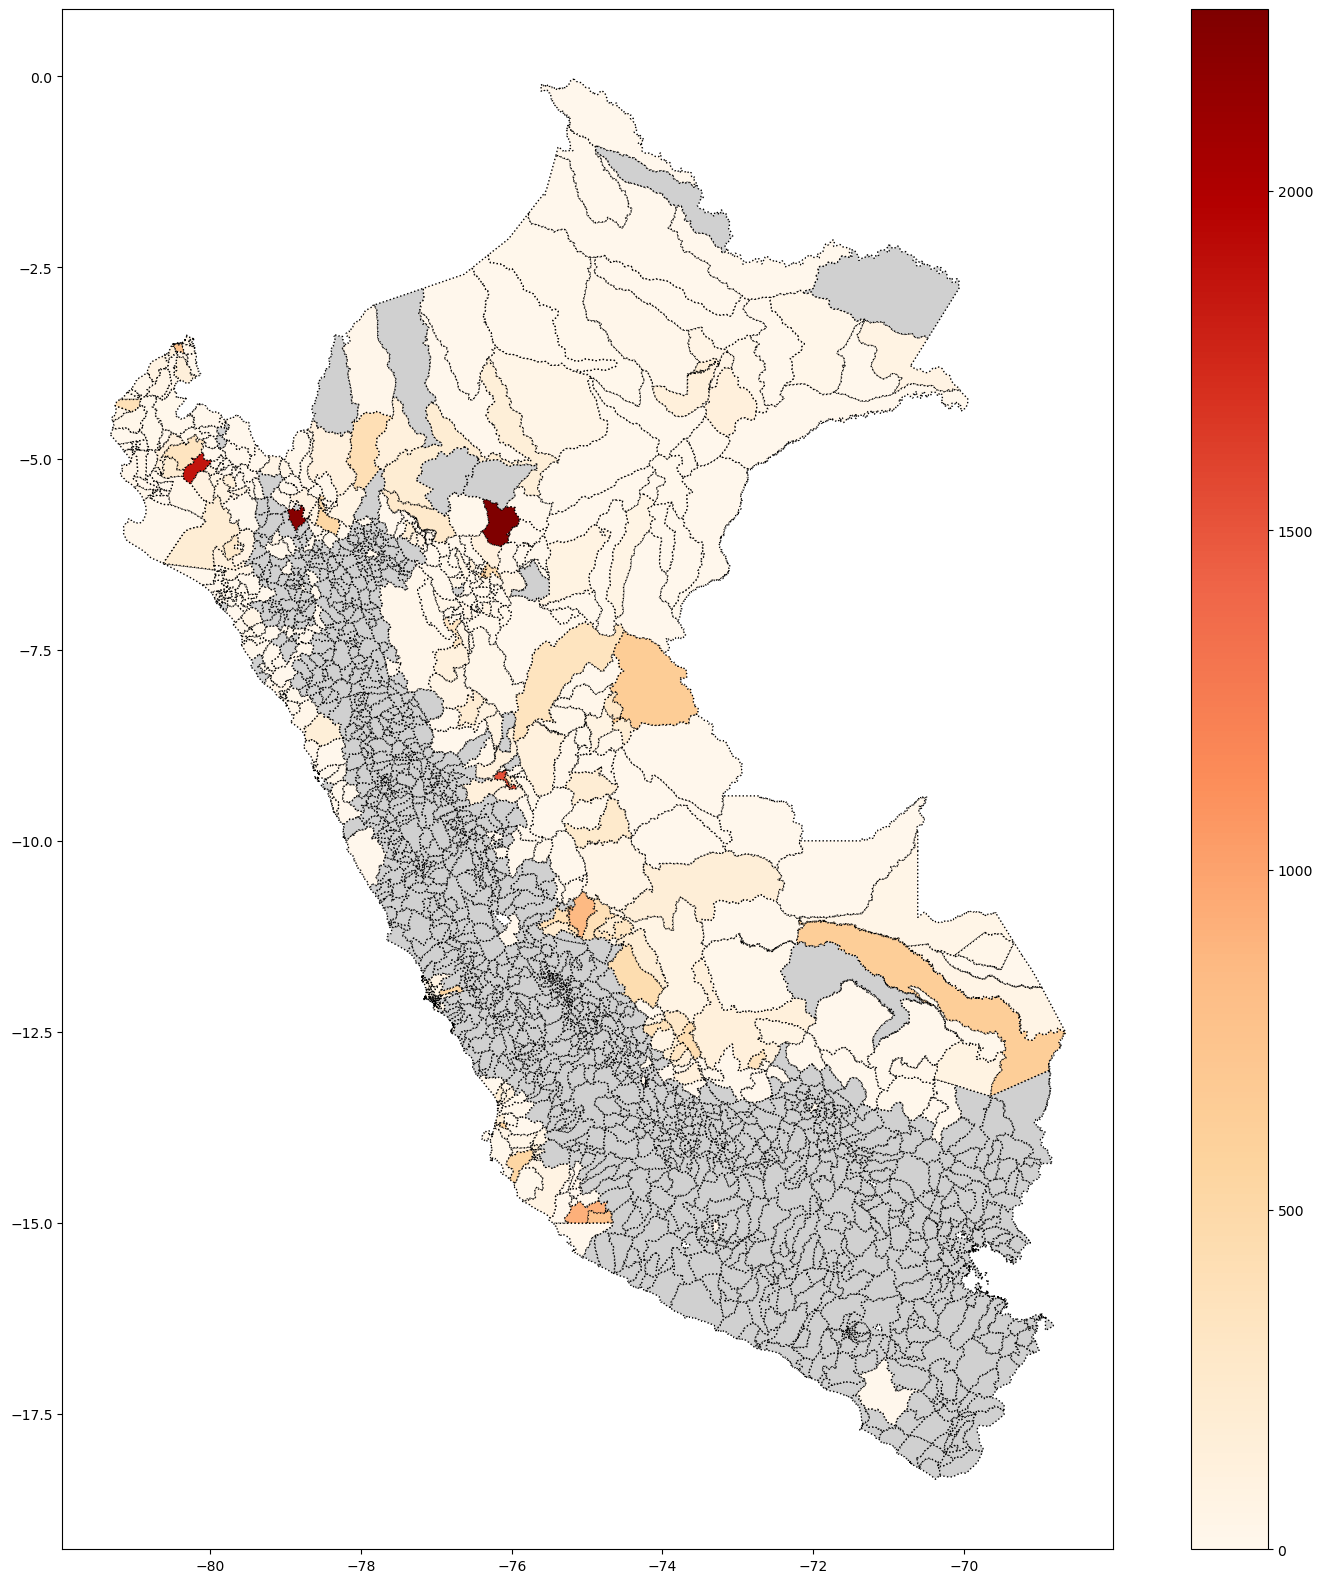

In [23]:
cmap = plt.cm.OrRd
dg_map1.plot( figsize = (20 , 20 ), 
             column = 'Casos', 
             cmap = cmap, 
             linestyle = 'dotted', 
             edgecolor = 'black', 
             legend = True, 
             missing_kwds = dict( color = '#D0D0D0' ) )
plt.show()

4. Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use the provided shapefile. For this task, you will have to aggregate shapefiles at the province level.


In [24]:
# Select the relevant columns from the latter dataset
dg_map2 = dg_map1[['IDPROV', "geometry", "Casos"]]
dg_map2

,IDPROV,geometry,Casos
0,0605,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",NaN
1,0611,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN
2,0611,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN
3,0611,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN
4,0612,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN
...,...,...,...
1869,0404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",NaN
1870,0404,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",NaN
1871,0404,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",NaN
1872,0404,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",NaN


In [25]:
# Use "dissolve" method to aggregate by "IDPROV"
prov = dg_map2.dissolve(by='IDPROV', aggfunc='sum')

#Replace 0 with NaN
prov.replace(0, np.nan, inplace=True)
prov

,geometry,Casos
IDPROV,,
0101,"POLYGON ((-77.78428 -6.94651, -77.78553 -6.948...",NaN
0102,"POLYGON ((-78.32620 -5.56382, -78.32625 -5.565...",676.0
0103,"POLYGON ((-77.93780 -6.03777, -77.93781 -6.037...",NaN
0104,"POLYGON ((-77.58527 -4.47289, -77.58594 -4.475...",435.0
0105,"POLYGON ((-77.93702 -6.69093, -77.93914 -6.693...",NaN
...,...,...
2403,"POLYGON ((-80.19606 -3.61959, -80.19610 -3.620...",72.0
2501,"POLYGON ((-73.27613 -9.68486, -73.27596 -9.685...",1241.0
2502,"POLYGON ((-72.18238 -11.01266, -72.18112 -11.0...",179.0


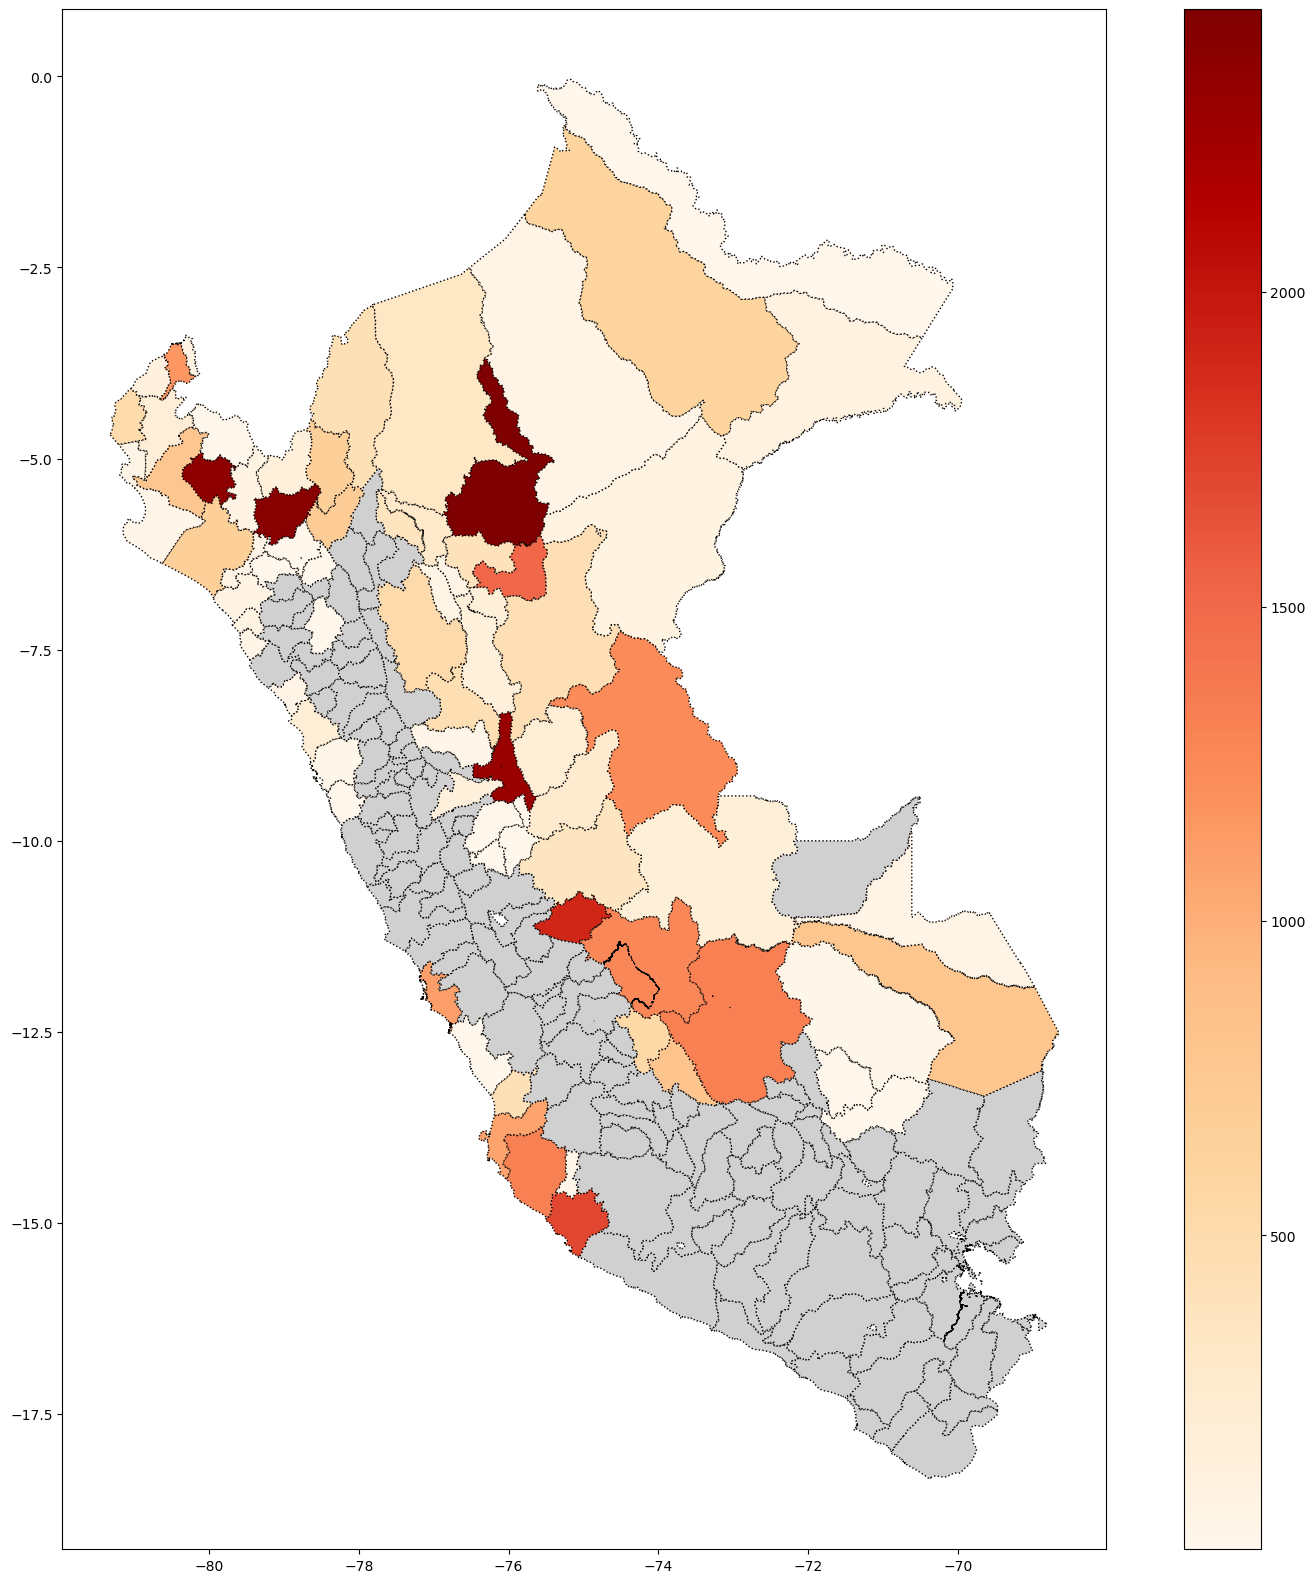

In [26]:
#Plot
cmap = plt.cm.OrRd
prov.plot( figsize = (20 , 20 ), 
             column = 'Casos', 
             cmap = cmap, 
             linestyle = 'dotted', 
             edgecolor = 'black', 
             legend = True, 
             missing_kwds = dict( color = '#D0D0D0' ) )
plt.show()

5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use the provided shapefile. For this task, you will have to aggregate shapefiles at the department level.


In [30]:
maps_6 = maps[['CCDD', 'geometry']]
maps_6 = maps_6.dissolve( by = 'CCDD' ).reset_index()
maps_6 = maps_6.rename(columns={'CCDD':'UBIDPTO'})
maps_6

,UBIDPTO,geometry
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,02,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
2,03,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
3,04,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
4,05,"POLYGON ((-74.50188 -15.16058, -74.50191 -15.1..."
5,06,"POLYGON ((-79.07326 -7.46865, -79.08528 -7.462..."
6,07,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0..."
7,08,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7..."
8,09,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."
9,10,"POLYGON ((-76.80833 -10.39296, -76.81024 -10.3..."


In [31]:
dpt_dengue6 = maps_6.merge(df_dengue)
dpt_dengue6

,UBIDPTO,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,UBIPROV
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,EL PARCO,BAGUA,010204,NaN,0102
1,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,COPALLIN,BAGUA,010203,NaN,0102
2,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,BAGUA GRANDE,UTCUBAMBA,010701,NaN,0107
3,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,Dengue,AMAZONAS,EL PARCO,BAGUA,010204,NaN,0102
4,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,Dengue,AMAZONAS,COPALLIN,BAGUA,010203,NaN,0102
...,...,...,...,...,...,...,...,...,...,...,...
172139,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,49,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0,2503
172140,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,50,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0,2503
172141,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,51,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0,2503
172142,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2019,52,Dengue,UCAYALI,PADRE ABAD,PADRE ABAD,250301,0,2503


In [52]:
dpt_dengue_years = dpt_dengue6.iloc[:,[0,2,9]]
dpt_dengue_years

,UBIDPTO,Año,Casos
0,01,2021,NaN
1,01,2021,NaN
2,01,2021,NaN
3,01,2021,NaN
4,01,2021,NaN
...,...,...,...
172139,25,2019,0
172140,25,2019,0
172141,25,2019,0
172142,25,2019,0


In [55]:
# Convert the column 'data' to numeric, forcing non-convertible to NaN
dpt_dengue_years['Casos'] = pd.to_numeric(dpt_dengue_years['Casos'], errors='coerce')

C:\Users\kramirez\AppData\Local\Temp\ipykernel_23892\1715770372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpt_dengue_years['Casos'] = pd.to_numeric(dpt_dengue_years['Casos'], errors='coerce')


In [56]:
dpt_dengue_years1 = dpt_dengue_years.groupby(['UBIDPTO','Año']).sum().reset_index()
dpt_dengue_years1

,UBIDPTO,Año,Casos
0,01,2015,37.0
1,01,2016,90.0
2,01,2017,93.0
3,01,2018,109.0
4,01,2019,164.0
...,...,...,...
142,25,2017,779.0
143,25,2018,317.0
144,25,2019,214.0
145,25,2020,10934.0


In [57]:
dpt_dengue_years2 = dpt_dengue_years1.merge(maps_6)
dpt_dengue_years2

,UBIDPTO,Año,Casos,geometry
0,01,2015,37.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,01,2016,90.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
2,01,2017,93.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
3,01,2018,109.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
4,01,2019,164.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
...,...,...,...,...
142,25,2017,779.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
143,25,2018,317.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
144,25,2019,214.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
145,25,2020,10934.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."


In [60]:
# Si 'dist_2021_2' es un DataFrame y 'geometry' es el nombre de tu columna de geometría
dpt_dengue_years2 = gpd.GeoDataFrame(dpt_dengue_years2, geometry='geometry')

IndexError: index 7 is out of bounds for axis 0 with size 7

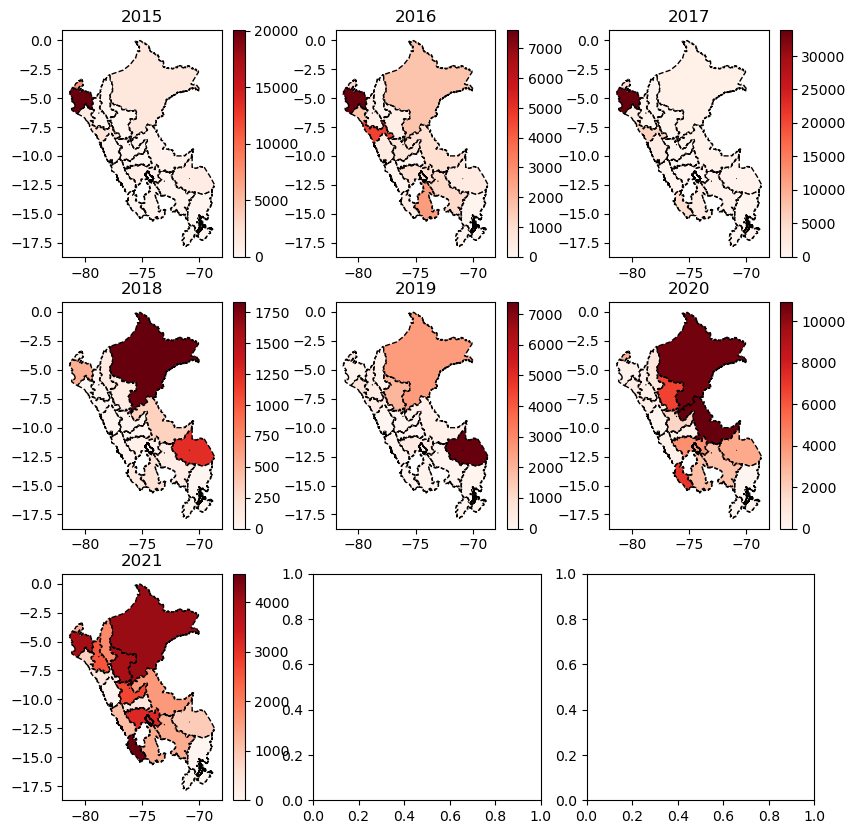

In [75]:
fig, axis = plt.subplots( nrows = 3, ncols= 3, figsize = ( 10, 10 ) )

idx = 0
for i in range( 3 ):
    for j in range ( 3 ):
        
        
        ax = axis[ i ][ j ]
        
        Año = dpt_dengue_years2.Año.unique()[ idx ]
        
        df_den = dpt_dengue_years2[ dpt_dengue_years2.Año == Año ]
        
        df_den.plot( column='Casos', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  missing_kwds= dict(color = "#DADADB"),
                  ax = ax 
                )
        
        ax.set_title( Año )
        
        idx = idx + 1

6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use the provided shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.


In [32]:
# Filter year 2021
de6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use the provided shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.
ngue_2021_qt = dpt_dengue6[dpt_dengue6.Año == 2021]
dengue_2021_qt

,UBIDPTO,geometry,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,UBIPROV
0,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,EL PARCO,BAGUA,010204,NaN,0102
1,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,COPALLIN,BAGUA,010203,NaN,0102
2,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,41,Dengue,AMAZONAS,BAGUA GRANDE,UTCUBAMBA,010701,NaN,0107
3,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,Dengue,AMAZONAS,EL PARCO,BAGUA,010204,NaN,0102
4,01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",2021,42,Dengue,AMAZONAS,COPALLIN,BAGUA,010203,NaN,0102
...,...,...,...,...,...,...,...,...,...,...,...
172091,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2021,51,Dengue,UCAYALI,RAYMONDI,ATALAYA,250201,NaN,2502
172092,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2021,52,Dengue,UCAYALI,CAMPOVERDE,CORONEL PORTILLO,250102,NaN,2501
172093,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2021,52,Dengue,UCAYALI,RAYMONDI,ATALAYA,250201,NaN,2502
172094,25,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",2021,53,Dengue,UCAYALI,CAMPOVERDE,CORONEL PORTILLO,250102,NaN,2501


In [33]:
dengue_2021_qt2 = dengue_2021_qt.iloc[:,[0,3,9]]
dengue_2021_qt2

,UBIDPTO,Semana,Casos
0,01,41,NaN
1,01,41,NaN
2,01,41,NaN
3,01,42,NaN
4,01,42,NaN
...,...,...,...
172091,25,51,NaN
172092,25,52,NaN
172093,25,52,NaN
172094,25,53,NaN


In [41]:
def assign_quarter(row):     # Calculates the quarter based on the value of 'Week'.
    quarter = ((row['Semana'] + 12) // 13) # 12 is added to the numerator to correctly handle weeks from 1 to 52.
    quarter = min(quarter, 4)
    return f'Q{quarter}'

In [42]:
dengue_2021_qt2['Trim'] = dengue_2021_qt2.apply(lambda row: assign_quarter(row), axis=1)

C:\Users\kramirez\AppData\Local\Temp\ipykernel_23892\523335547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021_qt2['Trim'] = dengue_2021_qt2.apply(lambda row: assign_quarter(row), axis=1)


In [43]:
dengue_2021_qt2

,UBIDPTO,Semana,Casos,Trim
0,01,41,NaN,Q4
1,01,41,NaN,Q4
2,01,41,NaN,Q4
3,01,42,NaN,Q4
4,01,42,NaN,Q4
...,...,...,...,...
172091,25,51,NaN,Q4
172092,25,52,NaN,Q4
172093,25,52,NaN,Q4
172094,25,53,NaN,Q4


In [45]:
# Convert the column 'data' to numeric, forcing non-convertible to NaN
dengue_2021_qt2['Casos'] = pd.to_numeric(dengue_2021_qt2['Casos'], errors='coerce')

C:\Users\kramirez\AppData\Local\Temp\ipykernel_23892\165318232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021_qt2['Casos'] = pd.to_numeric(dengue_2021_qt2['Casos'], errors='coerce')


In [46]:
dengue_2021_qt3 = dengue_2021_qt2.groupby(['UBIDPTO','Trim']).sum().reset_index()
dengue_2021_qt3

,UBIDPTO,Trim,Semana,Casos
0,01,Q1,1547,599.0
1,01,Q2,4420,609.0
2,01,Q3,7293,583.0
3,01,Q4,11067,39.0
4,02,Q1,819,3.0
...,...,...,...,...
79,24,Q4,8463,14.0
80,25,Q1,1547,923.0
81,25,Q2,4420,214.0
82,25,Q3,7293,424.0


In [47]:
dengue_2021_qt4 = pd.merge(dengue_2021_qt3, maps_6, on = ['UBIDPTO'], how = 'outer')
dengue_2021_qt5 = dengue_2021_qt4.sort_values('UBIDPTO').reset_index(drop=True)
dengue_2021_qt6 = dengue_2021_qt5.drop(columns = "Semana")
dengue_2021_qt6

,UBIDPTO,Trim,Casos,geometry
0,01,Q1,599.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,01,Q2,609.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
2,01,Q3,583.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
3,01,Q4,39.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
4,02,Q1,3.0,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
...,...,...,...,...
83,24,Q2,461.0,"POLYGON ((-80.39847 -3.98043, -80.39860 -3.980..."
84,25,Q1,923.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
85,25,Q2,214.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
86,25,Q3,424.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."


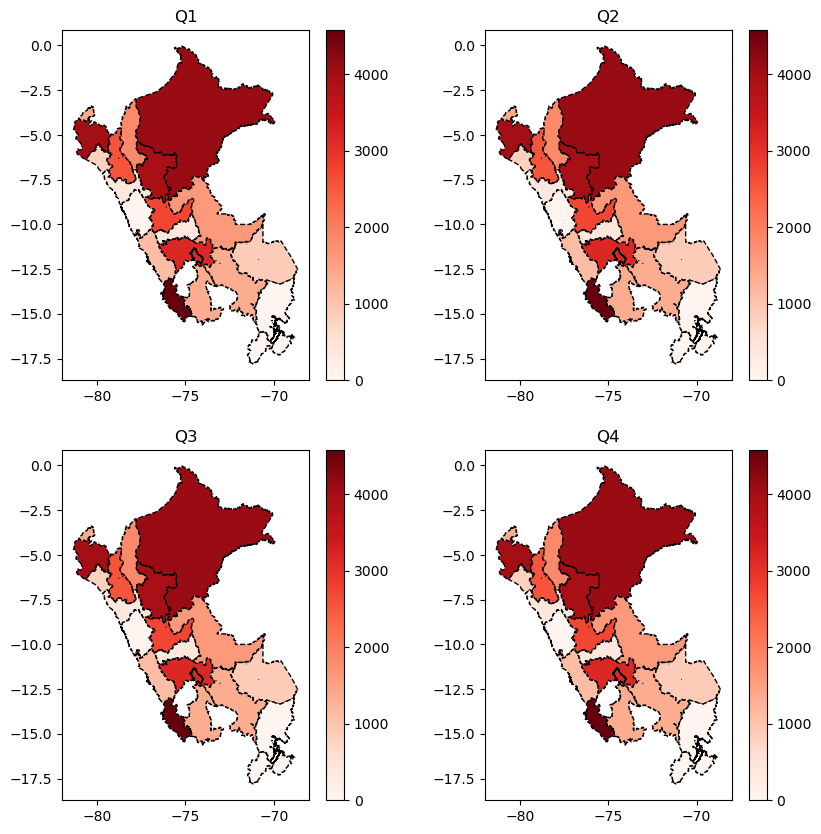

In [76]:
fig, axis = plt.subplots( nrows = 2, ncols= 2, figsize = ( 10, 10 ) )

idx = 0
for i in range( 2 ):
    for j in range ( 2 ):
        
        
        ax = axis[ i ][ j ]
        
        Qt = dengue_2021_qt6.Trim.unique()[ idx ]
        
        df_den1 = dengue_2021_qt6[ dengue_2021_qt6.Trim == Qt ]
        
        df_den.plot( column='Casos', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True,
                  missing_kwds= dict(color = "#DADADB"),
                  ax = ax 
                )
        
        ax.set_title( Qt )
        
        idx = idx + 1